# Code for Section 2.4 Skewness, kurtosis, and other interesting insights

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import fortitudo.tech as ft
from scipy.stats import norm
import matplotlib.pyplot as plt

# Download and preprocess data

In [2]:
tickers = [
    'XLB', 'XLE', 'XLF', 'XLI', 'XLK',
    'XLP', 'XLU', 'XLV', 'XLY', '^GSPC',
    '^IRX', '^TNX', '^TYX', '^VIX']
data = yf.download(tickers, start='1998-12-22', end='2024-10-12')['Adj Close']

names_dict = {
    'XLB': 'Materials', 'XLE': 'Energy', 'XLF': 'Financial', 'XLI': 'Industrial',
    'XLK': 'Technology', 'XLP': 'Consumer Staples', 'XLU': 'Utilities',
    'XLV': 'Health Care', 'XLY': 'Consumer Discretionary',
    '^GSPC': 'S&P 500', '^IRX': '13w yield', '^TNX': '2y yield',
    '^TYX': '30y yield', '^VIX': 'VIX'}
data = data.rename(columns=names_dict)

print(f'The number of daily observations is {len(data)}.')

[*********************100%%**********************]  14 of 14 completed

The number of daily observations is 6493.


# Compute equity returns

In [11]:
H = 252
equity_returns = (data.values[H:, 0:10] - data.values[0:-H, 0:10]) / data.iloc[0:-H, 0:10]
equity_returns_df = pd.DataFrame(100 * equity_returns, columns=data.columns[0:10])
equity_stats = ft.simulation_moments(equity_returns_df)

display(equity_stats)

,Mean,Volatility,Skewness,Kurtosis
Ticker,,,,
Materials,9.480553,19.088620,0.009315,4.791483
Energy,11.040706,26.530662,0.200931,3.191927
Financial,7.888051,23.742689,0.039915,5.225008
Industrial,9.858542,19.232705,-0.129689,4.699945
Technology,11.543197,25.381600,-0.587754,3.260407
Consumer Staples,7.593448,11.224842,-0.694259,3.862388
Utilities,8.325711,15.527299,-0.795591,3.821508
Health Care,9.160103,12.982925,-0.074496,3.186592
Consumer Discretionary,10.797317,19.304730,-0.016470,4.199731


# Plot equity return distributions (Figure 2.4.1)

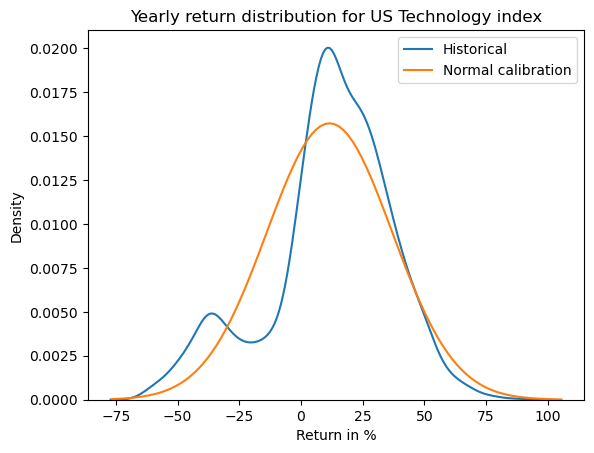

In [42]:
equity_index = 4  # Can be specified as desired
index_name = equity_returns_df.columns[equity_index]
x = np.linspace(
    1.2 * min(equity_returns_df[index_name]), 1.2 * max(equity_returns_df[index_name]), 100)
norm_calib = norm.pdf(x, loc=equity_stats['Mean'][index_name], scale=equity_stats['Volatility'][index_name])

sns.kdeplot(equity_returns_df[index_name])
plt.plot(x, norm_calib)
plt.title(f'Yearly return distribution for US {index_name} index')
plt.legend(['Historical', 'Normal calibration'])
plt.xlabel('Return in %')
plt.show()